https://dataplay.tistory.com/27

# - ResNet(ResNet50)

https://eremo2002.tistory.com/76

In [ ]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split

from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Conv2D, Activation, Dense, GlobalAveragePooling2D, MaxPooling2D, ZeroPadding2D, Add
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K

In [ ]:
img_dir = 'data/Images3'
categories = os.listdir(img_dir)
num_classes = len(categories)

In [ ]:
image_w = 224
image_h = 224

In [ ]:
X = []
y = []

for index, breed in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[index] = 1

    image_dir = img_dir + "/" + breed
    files = glob.glob(image_dir+"/*.jpg")
    print(index, ")", breed, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

0 ) n02085620-Chihuahua  파일 길이 :  152
1 ) n02085782-Japanese_spaniel  파일 길이 :  185
2 ) n02085936-Maltese_dog  파일 길이 :  252
3 ) n02086079-Pekinese  파일 길이 :  149
4 ) n02086240-Shih-Tzu  파일 길이 :  214
5 ) n02086646-Blenheim_spaniel  파일 길이 :  188
6 ) n02086910-papillon  파일 길이 :  196
7 ) n02088364-beagle  파일 길이 :  195
8 ) n02088466-bloodhound  파일 길이 :  187
9 ) n02089078-black-and-tan_coonhound  파일 길이 :  159
10 ) n02089867-Walker_hound  파일 길이 :  153
11 ) n02089973-English_foxhound  파일 길이 :  157
12 ) n02091032-Italian_greyhound  파일 길이 :  182
13 ) n02091134-whippet  파일 길이 :  187
14 ) n02093256-Staffordshire_bullterrier  파일 길이 :  155
15 ) n02093647-Bedlington_terrier  파일 길이 :  182
16 ) n02094258-Norwich_terrier  파일 길이 :  185
17 ) n02094433-Yorkshire_terrier  파일 길이 :  164
18 ) n02096294-Australian_terrier  파일 길이 :  196
19 ) n02096585-Boston_bull  파일 길이 :  182
20 ) n02097047-miniature_schnauzer  파일 길이 :  154
21 ) n02097209-standard_schnauzer  파일 길이 :  155
22 ) n02097658-silky_terrier  파일 길이 :  183

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
n = np.arange(X.shape[0])
np.random.seed(0)
np.random.shuffle(n)

In [ ]:
X = X[n]
y = y[n]

In [ ]:
print("Images shape after shuffling = ",X.shape,"\nLabels shape after shuffling = ",y.shape)

Images shape after shuffling =  (11418, 224, 224, 3) 
Labels shape after shuffling =  (11418, 65)


In [ ]:
X = X.astype(np.float32)
y = y.astype(np.int32)
X = X/255.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [ ]:
print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)

print("\nx_val shape = ",x_val.shape)
print("y_val shape = ",y_val.shape)

print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (8220, 224, 224, 3)
y_train shape =  (8220, 65)

x_val shape =  (914, 224, 224, 3)
y_val shape =  (914, 65)

x_test shape =  (2284, 224, 224, 3)
y_test shape =  (2284, 65)


In [ ]:
def conv1_layer(x):    
    x = ZeroPadding2D(padding=(3, 3))(x)
    x = Conv2D(32, (5, 5), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1,1))(x)
    return x   

In [ ]:
def conv2_layer(x):         
    x = MaxPooling2D((3, 3), 2)(x)
    shortcut = x
 
    for i in range(2):
        if (i == 0):
            x = Conv2D(32, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
            shortcut = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(shortcut)            
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)
 
            x = Add()([x, shortcut])
            x = Activation('relu')(x)
            
            shortcut = x
 
        else:
            x = Conv2D(32, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)            
 
            x = Add()([x, shortcut])   
            x = Activation('relu')(x)  
 
            shortcut = x        
    
    return x

In [ ]:
def conv3_layer(x):        
    shortcut = x    
    
    for i in range(2):     
        if(i == 0):            
            x = Conv2D(64, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)        
 
            x = Conv2D(128, (1, 1), strides=(1, 1), padding='same')(x)
            shortcut = Conv2D(128, (3, 3), strides=(2, 2), padding='same')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)            
 
            x = Add()([x, shortcut])    
            x = Activation('relu')(x)    
 
            shortcut = x              
        
        else:
            x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)            
 
            x = Add()([x, shortcut])     
            x = Activation('relu')(x)
 
            shortcut = x      
            
    return x

In [ ]:
def conv4_layer(x):
    shortcut = x        
  
    for i in range(2):     
        if(i == 0):            
            x = Conv2D(128, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)        

            x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
            shortcut = Conv2D(256, (1, 1), strides=(2, 2), padding='same')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)
 
            x = Add()([x, shortcut]) 
            x = Activation('relu')(x)
 
            shortcut = x               
        
        else:
            x = Conv2D(128, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)

            x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)            
 
            x = Add()([x, shortcut])    
            x = Activation('relu')(x)
 
            shortcut = x      
 
    return x

In [ ]:
def conv5_layer(x):
    shortcut = x    
  
    for i in range(2):     
        if(i == 0):            
            x = Conv2D(256, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)        
            
            x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
            shortcut = Conv2D(512, (1, 1), strides=(2, 2), padding='same')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)            
 
            x = Add()([x, shortcut])  
            x = Activation('relu')(x)      
 
            shortcut = x               
        
        else:
            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)           
            
            x = Add()([x, shortcut]) 
            x = Activation('relu')(x)       
 
            shortcut = x                  
 
    return x

In [ ]:
input_tensor = Input(shape=(image_w, image_h, 3), name='input')
x = conv1_layer(input_tensor)
x = conv2_layer(x)
x = conv3_layer(x)
x = conv4_layer(x)
x = conv5_layer(x)
 
x = GlobalAveragePooling2D()(x)
output_tensor = Dense(num_classes, activation='softmax')(x)
 
model = Model(input_tensor, output_tensor)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input[0][0]                      
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 113, 113, 32) 2432        zero_padding2d[0][0]             
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 113, 113, 32) 128         conv2d[0][0]                     
_______________________________________________________________________________________

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
K.set_value(model.optimizer.learning_rate, 0.001)

In [ ]:
history =model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), shuffle=True)

Epoch 1/100
257/257 [==============================] - 602s 2s/step - loss: 4.0698 - accuracy: 0.0569 - val_loss: 7.4567 - val_accuracy: 0.0230
Epoch 2/100
257/257 [==============================] - 603s 2s/step - loss: 3.6787 - accuracy: 0.0936 - val_loss: 4.3460 - val_accuracy: 0.0503
Epoch 3/100
257/257 [==============================] - 608s 2s/step - loss: 3.4225 - accuracy: 0.1324 - val_loss: 4.3211 - val_accuracy: 0.0230
Epoch 4/100
257/257 [==============================] - 606s 2s/step - loss: 3.2162 - accuracy: 0.1696 - val_loss: 5.6289 - val_accuracy: 0.0667
Epoch 5/100
257/257 [==============================] - 606s 2s/step - loss: 3.0028 - accuracy: 0.2074 - val_loss: 4.5837 - val_accuracy: 0.0525
Epoch 6/100
257/257 [==============================] - 606s 2s/step - loss: 2.7812 - accuracy: 0.2498 - val_loss: 3.8949 - val_accuracy: 0.1236
Epoch 7/100
257/257 [==============================] - 610s 2s/step - loss: 2.5691 - accuracy: 0.2915 - val_loss: 4.6153 - val_accuracy:

257/257 [==============================] - 584s 2s/step - loss: 0.0141 - accuracy: 0.9953 - val_loss: 7.1008 - val_accuracy: 0.2155
Epoch 58/100
257/257 [==============================] - 583s 2s/step - loss: 0.2701 - accuracy: 0.9189 - val_loss: 11.9582 - val_accuracy: 0.1072
Epoch 59/100
257/257 [==============================] - 584s 2s/step - loss: 0.2047 - accuracy: 0.9348 - val_loss: 5.7210 - val_accuracy: 0.1926
Epoch 60/100
257/257 [==============================] - 587s 2s/step - loss: 0.0578 - accuracy: 0.9831 - val_loss: 6.2489 - val_accuracy: 0.2024
Epoch 61/100
257/257 [==============================] - 584s 2s/step - loss: 0.0205 - accuracy: 0.9942 - val_loss: 5.2377 - val_accuracy: 0.2593
Epoch 62/100
257/257 [==============================] - 582s 2s/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 5.8279 - val_accuracy: 0.2604
Epoch 63/100
257/257 [==============================] - 585s 2s/step - loss: 0.0101 - accuracy: 0.9968 - val_loss: 5.5185 - val_accuracy: 0.26

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

print('\nLoss: {:.4f}, Acc: {:.4f}'.format(loss, accuracy))

72/72 [==============================] - 30s 413ms/step - loss: 5.5628 - accuracy: 0.2653

Loss: 5.5628, Acc: 0.2653


In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc=0)

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc=0)

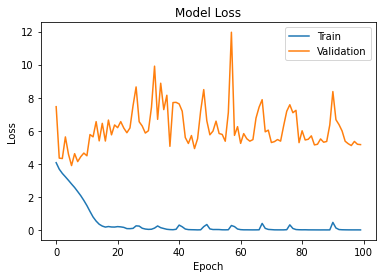

In [ ]:
plot_loss(history)
plt.show()

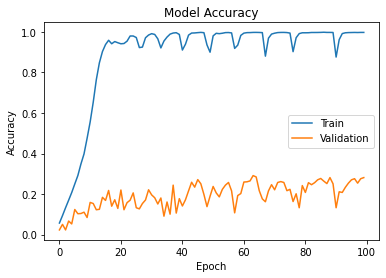

In [ ]:
plot_acc(history)
plt.show()

In [ ]:
predictions = model.predict(x_test)

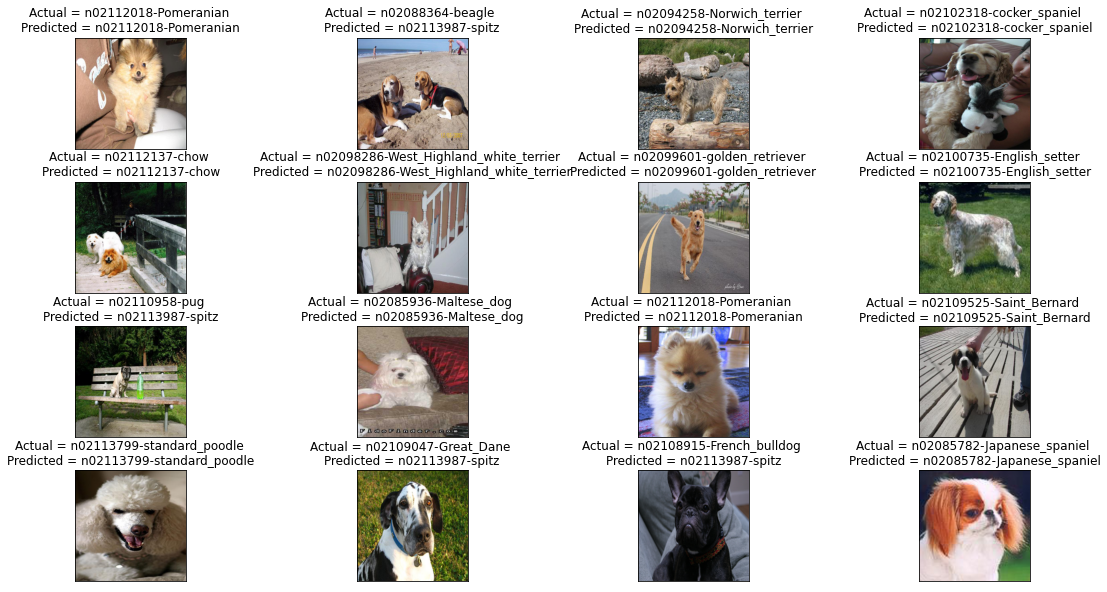

In [ ]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(16):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(4, 4, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {} \nPredicted = {}'.format(categories[np.argpartition(y_test[r[0]],-1)[-1:][0]] , categories[np.argpartition(predictions[r[0]][y_test[r[0]]],-1)[-1:][0]]))
    plt.xticks([]) , plt.yticks([])

plt.show()